<a href="https://colab.research.google.com/github/bk-12346/Semantic-Segmentation/blob/main/Semantic_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


# Install Libraries

In [3]:
!pip install keras-segmentation

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 66.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 753.3/753.3 kB 54.9 MB/s eta 0:00:00
  Created wheel for keras-segmentation: filename=keras_segmentation-0.3.0-py3-none-any.whl size=29063 sha256=8dc70a71a1b0aac859be2a6b46d9d4e53f52cf79ddfe01a16a68d88c864da673
  Stored in directory: /root/.cache/pip/wheels/2a/87/5b/ddc104c262fe1280e0565a2cc1b9b6b04963af12e462cdf068
Successfully built keras-segmentation
  Attempting uninstall: imageio
    Found existing installation: imageio 2.25.1
    Uninstalling imageio-2.25.1:
      Successfully uninstalled imageio-2.25.1
  Attempting uninstall: imgaug
    Found existing installation: imgaug 0.4.0
    Uninstalling imgaug-0.4.0:
      Successfully uninstalled imgaug-0.4.0


In [4]:
!pip install segmentation_models

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 5.8 MB/s eta 0:00:00


In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import cv2

!pip install -U -q segmentation-models
!pip install -q tensorflow==2.2.1
!pip install -q keras==2.5

os.environ["SM_FRAMEWORK"] = "tf.keras"

import tensorflow as tf
from tensorflow import keras
import imgaug as ia
from imgaug import augmenters as iaa
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score



import segmentation_models as sm
sm.set_framework('tf.keras')
sm.framework()

from segmentation_models import Unet
from segmentation_models.utils import set_trainable
from keras.preprocessing.image import ImageDataGenerator

import pandas as pd
import numpy as np
import random
from pathlib import Path

# for image processing
import imageio
import cv2
import skimage.transform

import matplotlib.pyplot as plt
import seaborn as sns

import scipy
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score

# Tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import Xception 

from tensorflow.keras.losses import CategoricalCrossentropy, MeanSquaredError, SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from keras.layers import Input
from keras.models import Model
!pip install tensorflow-addons
!pip install tensorflow-Ranking
import tensorflow_ranking as tfr
import tensorflow_addons as tfa
import tensorflow_probability as tfp

from tensorflow.keras.utils import plot_model

ERROR: Could not find a version that satisfies the requirement tensorflow==2.2.1 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.13.0rc0)
ERROR: No matching distribution found for tensorflow==2.2.1
ERROR: Could not find a version that satisfies the requirement keras==2.5 (from versions: 0.2.0, 0.3.0, 0.3.1, 0.3.2, 0.3.3, 1.0.0, 1.0.1, 1.0.2, 1.0.3, 1.0.4, 1.0.5, 1.0.6, 1.0.7, 1.0.8, 1.1.0, 1.1.1, 1.1.2, 1.2.0, 1.2.1, 1.2.2, 2.0.0, 2.0.1, 2.0.2, 2.0.3, 2.0.4, 2.0.5, 2.0.6, 2.0.7, 2.0.8, 2.0.9, 2.1.0, 2.1.1, 2.1.2, 2.1.3, 2.1.4, 2.1.5, 2.1.6, 2.2.0, 2.2.1, 2.2.2, 2.2.3, 2.2.4, 2.2.5, 2.3.0, 2.3.1, 2.4.0, 2.4.1, 2.4.2, 2.4.3, 2.5.0rc0, 2.6.0rc0, 2.6.0rc1, 2.6.0rc2, 2.6.0rc3, 2.6.0, 2.7.0rc0, 2.7.0rc2, 2.7.0, 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0,

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [6]:
# Setting file path
os.chdir("/content/gdrive/MyDrive/dataset1")

test_label_path=os.path.join('/content/gdrive/MyDrive/dataset1/annotations_prepped_test')
train_image_path=os.path.join('/content/gdrive/MyDrive/dataset1/images_prepped_train')
train_label_path=os.path.join('/content/gdrive/MyDrive/dataset1/annotations_prepped_train')
test_image_path=os.path.join('/content/gdrive/MyDrive/dataset1/images_prepped_test')

# Data Visualization

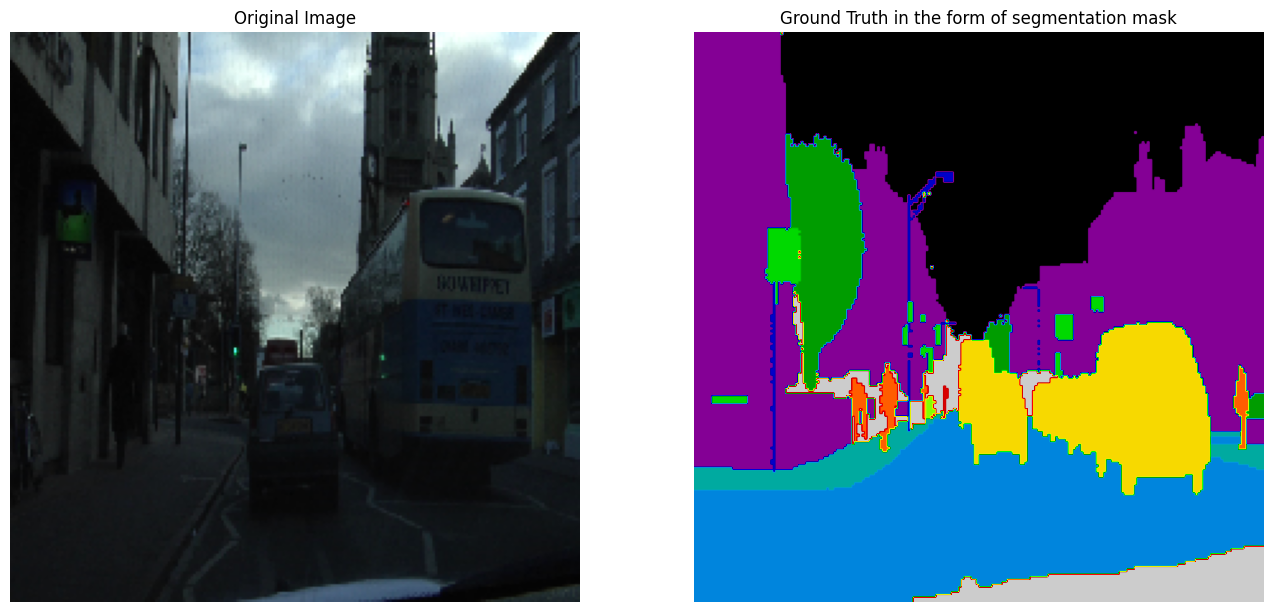

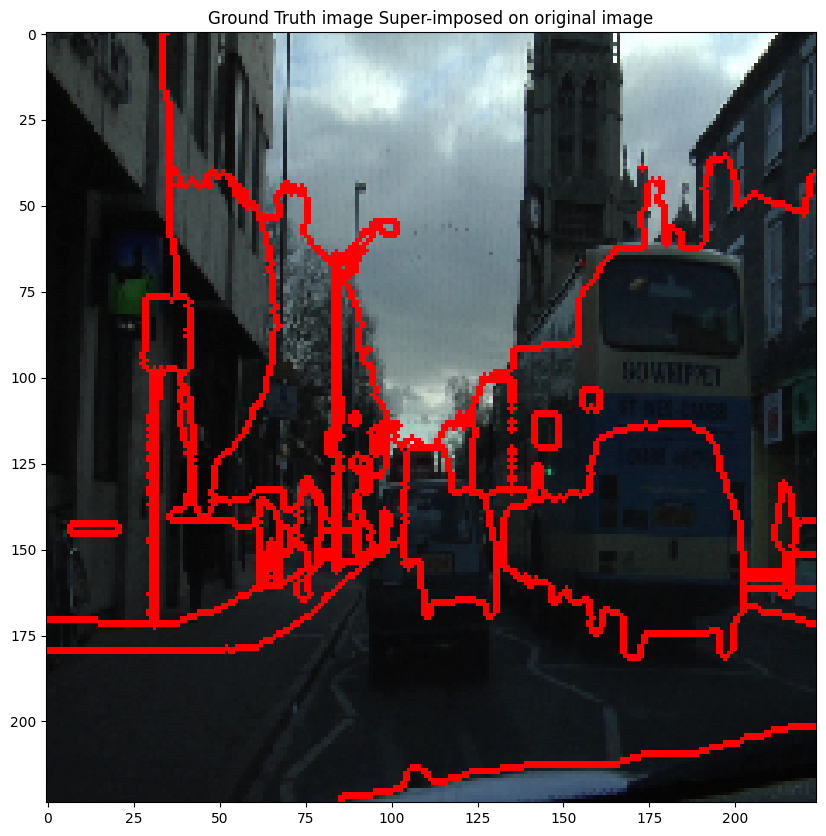

In [7]:
train_image = [os.path.join(train_image_path,fname) for fname in os.listdir(train_image_path)[:]]
train_label = [os.path.join(train_label_path,fname) for fname in os.listdir(train_label_path)[:]]
test_image = [os.path.join(test_image_path,fname) for fname in os.listdir(test_image_path)[:]]
test_label = [os.path.join(test_label_path,fname) for fname in os.listdir(test_label_path)[:]]

image_size = (224,224)

def open_image(img):
    return np.array(Image.open(img).resize(image_size, Image.NEAREST))  # load data

train_images = np.stack([open_image(i) for i in train_image])
train_labels = np.stack([open_image(i) for i in train_label])
test_images = np.stack([open_image(i) for i in test_image])
test_labels = np.stack([open_image(i) for i in test_label])

plt.figure(figsize = (25,25))
cells_color=[1, 1, 0]

image= train_images[3]
mask= train_labels[3]

plt.subplot(1, 3, 1)                    #to plot image
plt.imshow(image)
plt.axis('off')
plt.title('Original Image')

plt.subplot(1, 3, 2)                    # to plot the ground label
plt.imshow(mask, cmap='nipy_spectral')
plt.axis('off')
plt.title('Ground Truth in the form of segmentation mask')
plt.show

from skimage.transform import rescale, resize, downscale_local_mean
from skimage.segmentation import mark_boundaries

plt.figure(figsize=(10,10))
edges_pz = mark_boundaries(image, mask,color=(1,0,0), mode='thin')
plt.imshow(edges_pz)
plt.title('Ground Truth image Super-imposed on original image')
plt.show()

# Architecture 1:
Unet-densenet121 Model using Transfer Learning

In [8]:
model = Unet(backbone_name='densenet121', classes=12, encoder_weights='imagenet', encoder_freeze=True)

#defining the jaccard loss
def bce_jaccard_loss(y_true, y_pred):
    epsilon = 1e-7
    intersection = tf.reduce_sum(y_true * y_pred, axis=[1,2,3])
    union = tf.reduce_sum(y_true + y_pred, axis=[1,2,3]) - intersection
    loss = tf.reduce_mean(-(tf.math.log(intersection + epsilon) - tf.math.log(union + epsilon)))
    return loss

#defining the intersection-over-union (iou) loss
def iou_score(y_true, y_pred):
    intersection = tf.reduce_sum(y_true * y_pred, axis=[1,2,3])
    union = tf.reduce_sum(y_true + y_pred, axis=[1,2,3]) - intersection
    iou = tf.reduce_mean((intersection + 1e-7) / (union + 1e-7))
    return iou

model.compile('Adam', loss=[bce_jaccard_loss], metrics=[iou_score, 'Accuracy'])


model.summary()

29084464/29084464 [==============================] - 35s 1us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, None, None,   0          ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 conv1/conv (Conv2D)            (None, None, None,   9408        ['zero_padding2d[0][0]']         
                            

Architecture Plot

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.719917 to fit



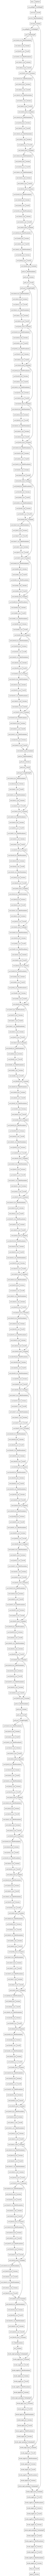

In [9]:
plot_model(model, to_file='/content/gdrive/MyDrive/dataset1/Unet_densenet_model.png')

# Data Augmentation

In [10]:
PATH='/content/gdrive/MyDrive/dataset1/'

targetsize = (224,224)
batch = 5

def create_augmentation_pipeline():
    augmentation_pipeline = A.Compose(
    [
        A.HorizontalFlip(p = 0.5),              # applying a horizontal flip to half (50%) of images
     
     #applying one of the following transforms to half of images
        A.OneOf(
            [            
                A.RandomContrast(),             # to apply a random contrast
                A.RandomGamma(),                # to apply some random gamma
                A.RandomBrightness(),           # to apply some random brightness
            ],
            p = 0.5 
        ),
     
        A.OneOf(
            [
                A.ElasticTransform(
                    alpha = 120,
                    sigma = 120 * 0.05,
                    alpha_affine = 120 * 0.03
                ),
                A.GridDistortion()
            ],
            p = 0.5 
        )
    ],
    p = 1
    )   
    return augmentation_pipeline
  
def create_datagenerator(PATH):
    options = {'horizontal_flip': True, 'vertical_flip': True}
    image_datagen = ImageDataGenerator(rescale=1./255, **options)
    mask_datagen = ImageDataGenerator(**options)
    val_datagen = ImageDataGenerator(rescale=1./255)
    val_datagen_mask = ImageDataGenerator(rescale=1)
    
    # creating a custom batch size
    def combine_generator(gen1, gen2, batch=5, training=True):
        while True:
            image_batch, label_batch = next(gen1)[0], np.expand_dims(next(gen2)[0][:,:,0],axis=-1)
            image_batch, label_batch = np.expand_dims(image_batch,axis=0), np.expand_dims(label_batch,axis=0)

            for i in range(batch - 1):
                image_i,label_i = next(gen1)[0], np.expand_dims(next(gen2)[0][:,:,0],axis=-1)
              
                if training == True:
                    aug_pipeline = create_augmentation_pipeline()
                    augmented = aug_pipeline(image=image_i, mask=label_i)
                    image_i, label_i = augmented['image'], augmented['mask']

                image_i, label_i = np.expand_dims(image_i,axis=0),np.expand_dims(label_i,axis=0)
                image_batch = np.concatenate([image_batch,image_i],axis=0)
                label_batch = np.concatenate([label_batch,label_i],axis=0)
              
            yield((image_batch,label_batch))


    seed = np.random.randint(0,1e5)

    train_image_generator = image_datagen.flow_from_directory(PATH+'images_prepped_train', seed=seed, target_size=targetsize, class_mode=None, batch_size=batch)
    train_mask_generator = mask_datagen.flow_from_directory(PATH+'annotations_prepped_train', seed=seed, target_size=targetsize, class_mode=None, batch_size=batch)
    train_generator = combine_generator(train_image_generator, train_mask_generator,training=True)
    
    val_image_generator = val_datagen.flow_from_directory(PATH+'images_prepped_test', seed=seed, target_size=targetsize, class_mode=None, batch_size=batch)
    val_mask_generator = val_datagen_mask.flow_from_directory(PATH+'annotations_prepped_test', seed=seed, target_size=targetsize, class_mode=None, batch_size=batch)
    val_generator = combine_generator(val_image_generator, val_mask_generator,training=False)
    
    return train_generator, val_generator


seed=24
img_data_gen_args = dict(rotation_range=90,
                     width_shift_range=0.3,
                     height_shift_range=0.3,
                     shear_range=0.5,
                     zoom_range=0.3,
                     horizontal_flip=True,
                     vertical_flip=True,
                     fill_mode='reflect')

labels_data_gen_args = dict(rotation_range=90,
                     width_shift_range=0.3,
                     height_shift_range=0.3,
                     shear_range=0.5,
                     zoom_range=0.3,
                     horizontal_flip=True,
                     vertical_flip=True,
                     fill_mode='reflect') 

image_data_generator = ImageDataGenerator(**img_data_gen_args)
image_data_generator.fit(train_images, augment=True, seed=seed)

image_generator = image_data_generator.flow(train_images, seed=seed)
valid_img_generator = image_data_generator.flow(test_images, seed=seed)
tr_labels=train_labels.reshape(367, 224, 224,1)
ts_labels=test_labels.reshape(101, 224, 224,1)
mask_data_generator = ImageDataGenerator(**labels_data_gen_args)
mask_data_generator.fit(tr_labels+(1,), augment=True, seed=seed)

mask_generator = mask_data_generator.flow(tr_labels, seed=seed)
valid_mask_generator = mask_data_generator.flow(ts_labels, seed=seed)

def img_generator(image_generator, mask_generator):
    train_generator = zip(image_generator, mask_generator)
    for (img, mask) in train_generator:
        yield (img, mask)

tr_gen = img_generator(image_generator, mask_generator)

val_gen = img_generator(valid_img_generator, valid_mask_generator)


import joblib

def train_model(model, gen1, gen2, typeModel):
       
        epochs=10
        batch_size=32
        steps_per_epoch= 4*(len(train_images))//batch_size
            
        # stop training if no improvement after some epochs
        reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=2, verbose=1, mode='max', min_lr=0.00001)
        
        # save the best model during the traning
        checkpointer = ModelCheckpoint('/content/gdrive/MyDrive/dataset1/model' + str(typeModel) +'.h5', verbose=1, save_weights_only=True)

        training = model.fit_generator(generator=gen1
                                ,epochs=epochs
                                ,validation_data=gen2
                                ,steps_per_epoch=steps_per_epoch
                                ,validation_steps=steps_per_epoch
                                ,callbacks=[checkpointer, reduce_lr])
        joblib.dump(model, '/content/gdrive/MyDrive/dataset1/model_' + str(typeModel) +'.pkl', compress=1)

        return training


typeModel='Unet_Densenet'
trainer1 = train_model(model, tr_gen, val_gen, typeModel)

<ipython-input-10-2471474dd45b>:134: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  training = model.fit_generator(generator=gen1


Epoch 1/10
45/45 [==============================] - ETA: 0s - loss: -0.5223 - iou_score: 1.8279 - Accuracy: 0.1639
Epoch 1: saving model to /content/gdrive/MyDrive/dataset1/modelUnet_Densenet.h5


45/45 [==============================] - 129s 1s/step - loss: -0.5223 - iou_score: 1.8279 - Accuracy: 0.1639 - val_loss: -0.9550 - val_iou_score: 2.6120 - val_Accuracy: 0.6060 - lr: 0.0010
Epoch 2/10
45/45 [==============================] - ETA: 0s - loss: -1.0165 - iou_score: 2.8579 - Accuracy: 0.1575
Epoch 2: saving model to /content/gdrive/MyDrive/dataset1/modelUnet_Densenet.h5


45/45 [==============================] - 49s 1s/step - loss: -1.0165 - iou_score: 2.8579 - Accuracy: 0.1575 - val_loss: -0.8107 - val_iou_score: 2.2981 - val_Accuracy: 0.0955 - lr: 0.0010
Epoch 3/10
45/45 [==============================] - ETA: 0s - loss: -1.0560 - iou_score: 2.9731 - Accuracy: 0.2298
Epoch 3: saving model to /content/gdrive/MyDrive/dataset1/modelUnet_Densenet.h5


45/45 [==============================] - 52s 1s/step - loss: -1.0560 - iou_score: 2.9731 - Accuracy: 0.2298 - val_loss: -0.8416 - val_iou_score: 2.3770 - val_Accuracy: 0.1673 - lr: 0.0010
Epoch 4/10
45/45 [==============================] - ETA: 0s - loss: -1.0556 - iou_score: 2.9856 - Accuracy: 0.2674
Epoch 4: saving model to /content/gdrive/MyDrive/dataset1/modelUnet_Densenet.h5


45/45 [==============================] - 51s 1s/step - loss: -1.0556 - iou_score: 2.9856 - Accuracy: 0.2674 - val_loss: -0.8302 - val_iou_score: 2.3419 - val_Accuracy: 0.1969 - lr: 0.0010
Epoch 5/10
45/45 [==============================] - ETA: 0s - loss: -1.0712 - iou_score: 3.0297 - Accuracy: 0.2631
Epoch 5: saving model to /content/gdrive/MyDrive/dataset1/modelUnet_Densenet.h5


45/45 [==============================] - 50s 1s/step - loss: -1.0712 - iou_score: 3.0297 - Accuracy: 0.2631 - val_loss: -1.0761 - val_iou_score: 2.9967 - val_Accuracy: 0.2211 - lr: 0.0010
Epoch 6/10
45/45 [==============================] - ETA: 0s - loss: -1.0750 - iou_score: 3.0399 - Accuracy: 0.3126
Epoch 6: saving model to /content/gdrive/MyDrive/dataset1/modelUnet_Densenet.h5


45/45 [==============================] - 50s 1s/step - loss: -1.0750 - iou_score: 3.0399 - Accuracy: 0.3126 - val_loss: -0.8327 - val_iou_score: 2.3765 - val_Accuracy: 0.2121 - lr: 0.0010
Epoch 7/10
45/45 [==============================] - ETA: 0s - loss: -1.0788 - iou_score: 3.0452 - Accuracy: 0.3493
Epoch 7: saving model to /content/gdrive/MyDrive/dataset1/modelUnet_Densenet.h5


45/45 [==============================] - 69s 2s/step - loss: -1.0788 - iou_score: 3.0452 - Accuracy: 0.3493 - val_loss: -1.0444 - val_iou_score: 2.8947 - val_Accuracy: 0.2043 - lr: 0.0010
Epoch 8/10
45/45 [==============================] - ETA: 0s - loss: -1.0704 - iou_score: 3.0339 - Accuracy: 0.3674
Epoch 8: saving model to /content/gdrive/MyDrive/dataset1/modelUnet_Densenet.h5


45/45 [==============================] - 52s 1s/step - loss: -1.0704 - iou_score: 3.0339 - Accuracy: 0.3674 - val_loss: -1.1467 - val_iou_score: 3.2081 - val_Accuracy: 0.3448 - lr: 0.0010
Epoch 9/10
45/45 [==============================] - ETA: 0s - loss: -1.0656 - iou_score: 3.0160 - Accuracy: 0.4041
Epoch 9: saving model to /content/gdrive/MyDrive/dataset1/modelUnet_Densenet.h5


45/45 [==============================] - 49s 1s/step - loss: -1.0656 - iou_score: 3.0160 - Accuracy: 0.4041 - val_loss: -1.1470 - val_iou_score: 3.1913 - val_Accuracy: 0.5147 - lr: 0.0010
Epoch 10/10
45/45 [==============================] - ETA: 0s - loss: -1.0738 - iou_score: 3.0337 - Accuracy: 0.4188
Epoch 10: saving model to /content/gdrive/MyDrive/dataset1/modelUnet_Densenet.h5


45/45 [==============================] - 49s 1s/step - loss: -1.0738 - iou_score: 3.0337 - Accuracy: 0.4188 - val_loss: -1.1496 - val_iou_score: 3.2291 - val_Accuracy: 0.4999 - lr: 0.0010


# Evaluation

5/5 [==============================] - 6s 445ms/step


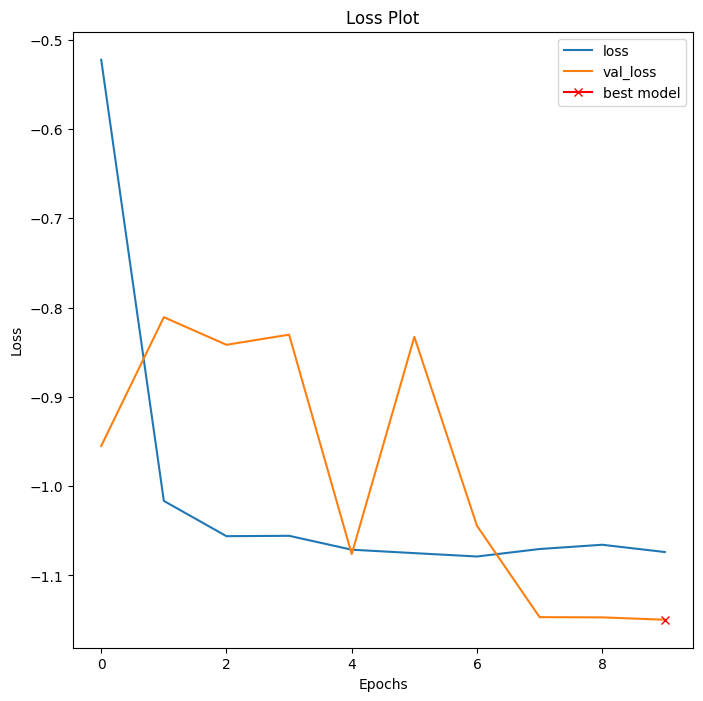

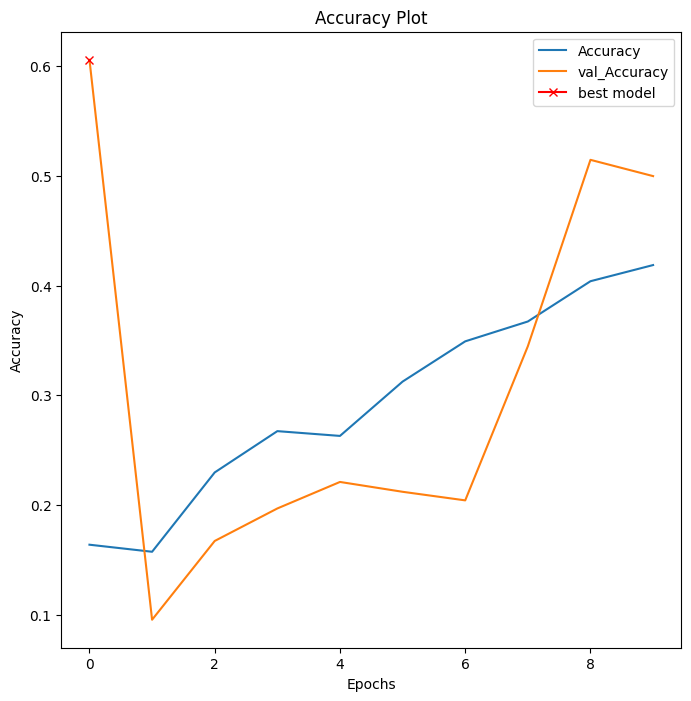

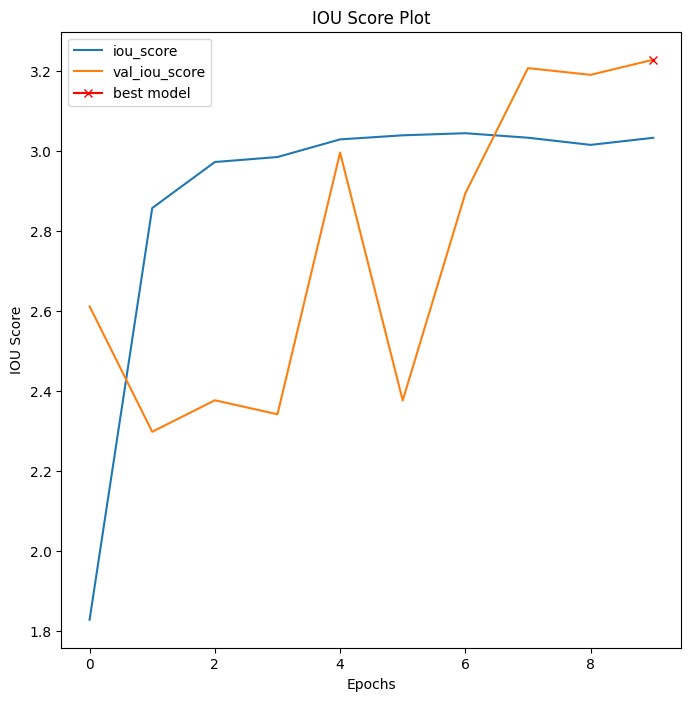

Dice Coeff :  1.5216081849774084
Accuracy 0.3062605485320091
Sensitivity :  0.0
Specificity :  1.0
F1-Score :  0.2596162498105678


In [11]:
class evaluation:
  
    def __init__(self, model, training, generator, y_true):
        self.training = training
        self.generator = generator

        steps=5
        
        self.y_pred = model.predict(self.generator, steps=steps)
        index_array = np.argmax(self.y_pred, axis=-1)
        self.y_pred=np.take_along_axis(self.y_pred, np.expand_dims(index_array, axis=-1), axis=-1).squeeze(axis=-1)
        self.y_true=y_true[:len(self.y_pred)] 

    def plot_history(self):

        plt.figure(figsize=(8, 8))
        plt.title("Loss Plot")
        plt.plot(self.training.history["loss"], label="loss")
        plt.plot(self.training.history["val_loss"], label="val_loss")
        plt.plot( np.argmin(self.training.history["val_loss"]), np.min(self.training.history["val_loss"]), marker="x", color="r", label="best model")
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.legend();
        plt.show()

        plt.figure(figsize=(8, 8))
        plt.title("Accuracy Plot")
        plt.plot(self.training.history["Accuracy"], label="Accuracy")
        plt.plot(self.training.history["val_Accuracy"], label="val_Accuracy")
        plt.plot( np.argmax(self.training.history["val_Accuracy"]), np.max(self.training.history["val_Accuracy"]), marker="x", color="r", label="best model")
        plt.xlabel("Epochs")
        plt.ylabel("Accuracy")
        plt.legend();
        plt.show()

        plt.figure(figsize=(8, 8))
        plt.title("IOU Score Plot")
        plt.plot(self.training.history["iou_score"], label="iou_score")
        plt.plot(self.training.history["val_iou_score"], label="val_iou_score")
        plt.plot( np.argmax(self.training.history["val_iou_score"]), np.max(self.training.history["val_iou_score"]), marker="x", color="r", label="best model")
        plt.xlabel("Epochs")
        plt.ylabel("IOU Score")
        plt.legend();
        plt.show()


    def print_report(self):


        #Dice Coeff
        y_true_f = self.y_true.flatten()
        y_pred_f = np.round(self.y_pred.flatten()).astype(int)
      

        union = np.sum(y_true_f) + np.sum(y_pred_f)
        if union==0: dc= 1
        intersection = np.sum(y_true_f * y_pred_f)
        dc= 2. * intersection / union
        print('Dice Coeff : ', dc)

        print('Accuracy', np.mean(self.training.history["val_Accuracy"]))

        # Confusion matrix
        cm1 = confusion_matrix(y_true_f, y_pred_f)
        total1=np.sum(cm1)
        
        # Accuracy
        sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        print('Sensitivity : ', sensitivity1 )
        
        # Specificity
        specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        print('Specificity : ', specificity1)

        #F1 Score
        f1=f1_score(y_true_f, y_pred_f, average='micro')
        print('F1-Score : ', f1)


evaluator = evaluation(model, trainer1, test_images, test_labels)
evaluator.plot_history()
evaluator.print_report()

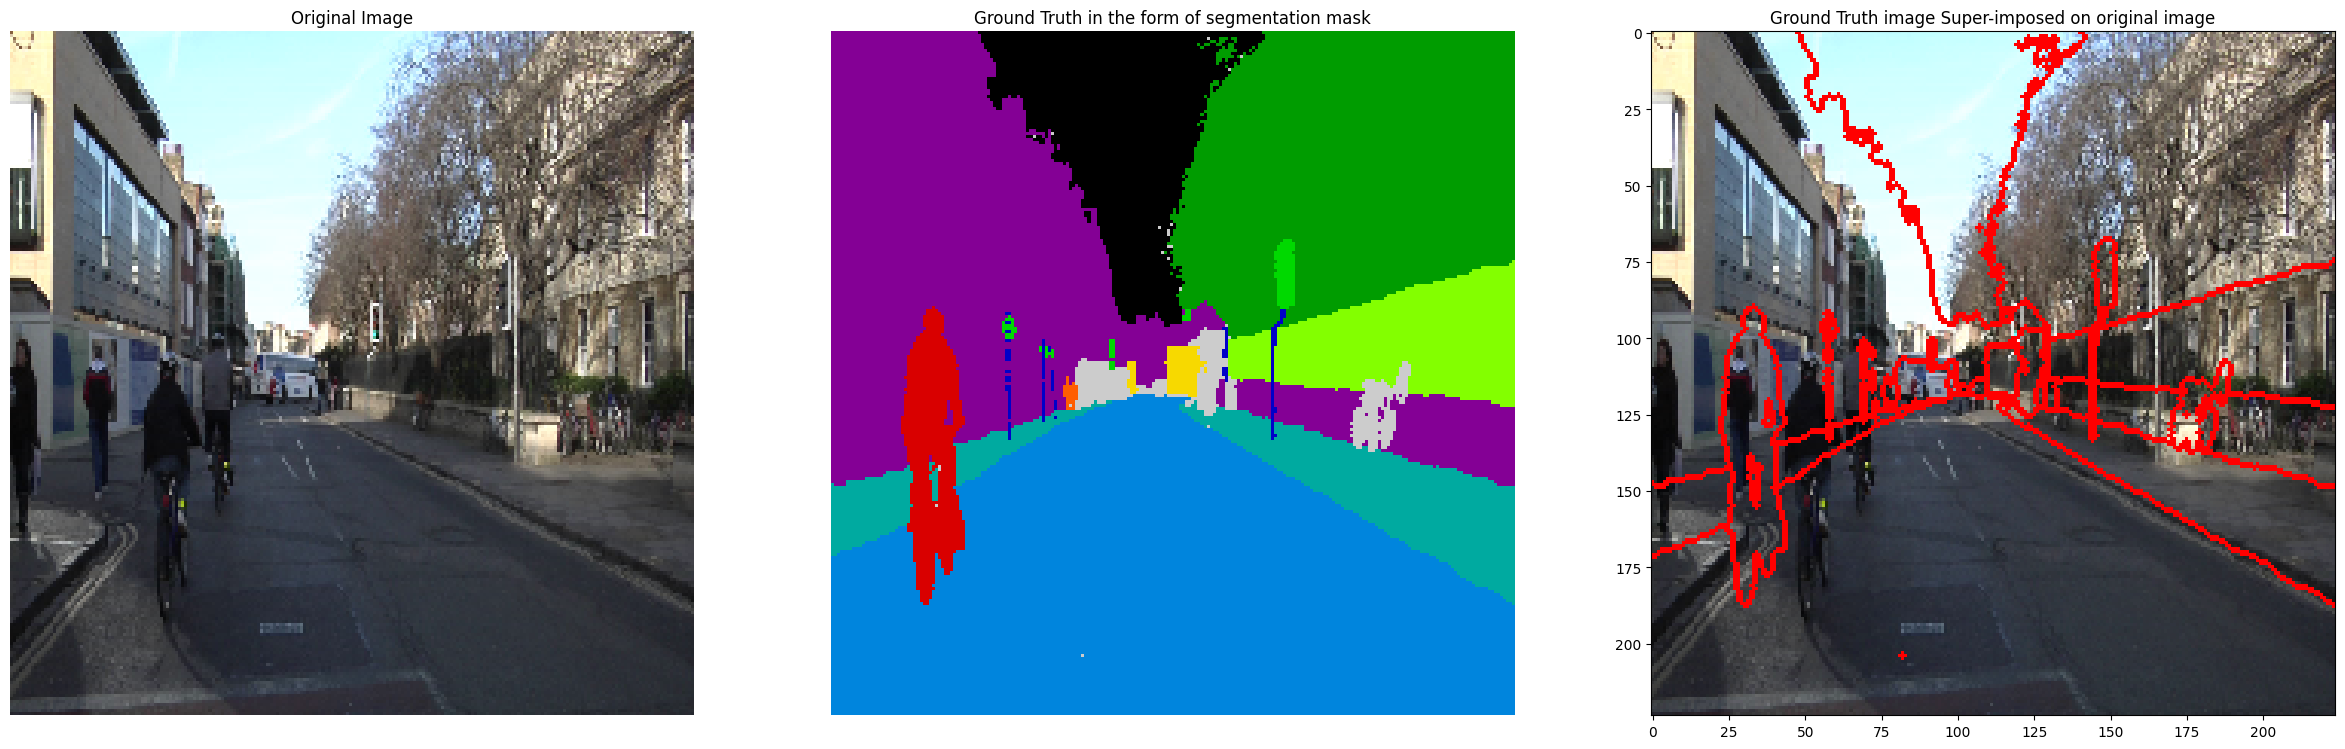

4/4 [==============================] - 0s 45ms/step


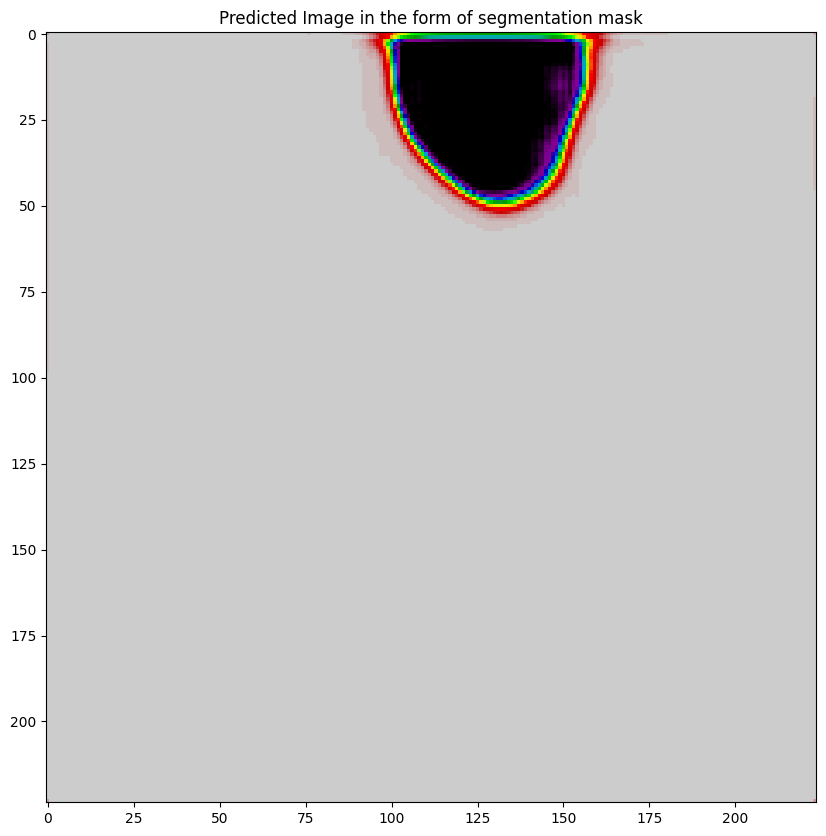

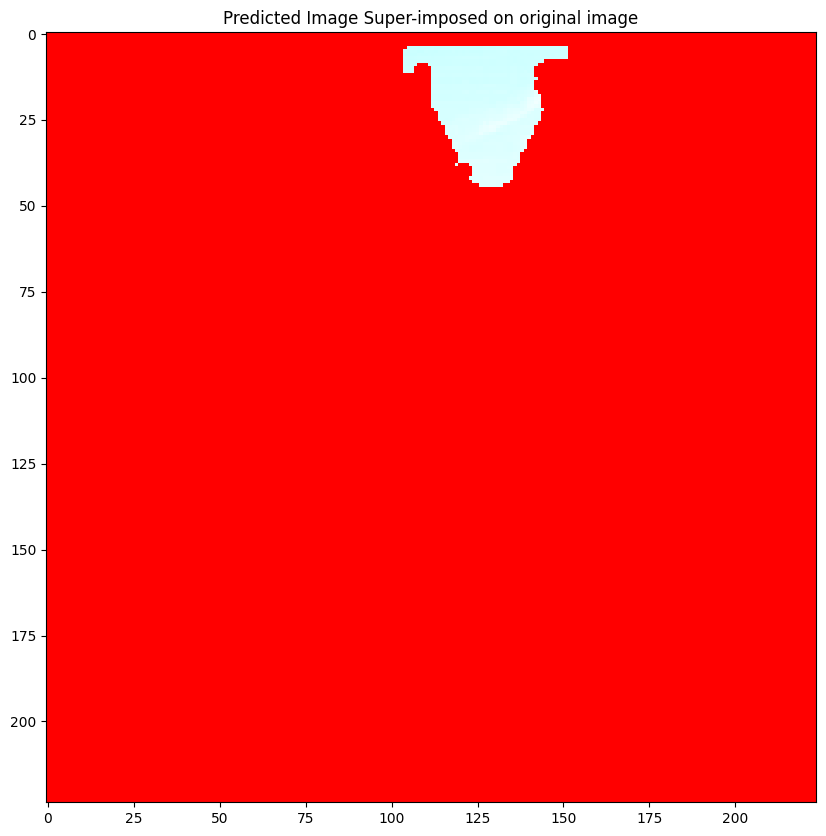

In [17]:
# Qualitative Analysis

plt.figure(figsize=(30,30))
plt.subplot(1, 3, 1)
plt.imshow(test_images[100])
plt.axis('off')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(test_labels[100], cmap='nipy_spectral')
plt.axis('off')
plt.title('Ground Truth in the form of segmentation mask')
plt.show


plt.subplot(1, 3, 3)
edges_pz = mark_boundaries(test_images[100], test_labels[100], color=(1,0,0), mode='thin')
plt.imshow(edges_pz)
plt.title('Ground Truth image Super-imposed on original image')
plt.show()

plt.figure(figsize=(10,10))
pred_image = model.predict(test_images)
p=pred_image[3]
index_array = np.argmax(p, axis=-1)
p=np.take_along_axis(p, np.expand_dims(index_array, axis=-1), axis=-1).squeeze(axis=-1)
plt.imshow(p, cmap='nipy_spectral')
plt.title('Predicted Image in the form of segmentation mask')
plt.show()

plt.figure(figsize=(10,10))
edges_pz = mark_boundaries(test_images[3], p, color=(1,0,0), mode='thin')
plt.imshow(edges_pz)
plt.title('Predicted Image Super-imposed on original image')
plt.show()


# Architecture 2:
Unet Squeez-and-exite-ResNext Model using Transfer Learning

In [13]:
model1 = Unet(backbone_name='seresnext50', classes=12, encoder_weights='imagenet', encoder_freeze=True)

#defining the jaccard loss
def bce_jaccard_loss(y_true, y_pred):
    epsilon = 1e-7
    intersection = tf.reduce_sum(y_true * y_pred, axis=[1,2,3])
    union = tf.reduce_sum(y_true + y_pred, axis=[1,2,3]) - intersection
    loss = tf.reduce_mean(-(tf.math.log(intersection + epsilon) - tf.math.log(union + epsilon)))
    return loss

#defining the intersection-over-union (iou) loss
def iou_score(y_true, y_pred):
    intersection = tf.reduce_sum(y_true * y_pred, axis=[1,2,3])
    union = tf.reduce_sum(y_true + y_pred, axis=[1,2,3]) - intersection
    iou = tf.reduce_mean((intersection + 1e-7) / (union + 1e-7))
    return iou

model1.compile('Adam', loss=[bce_jaccard_loss], metrics=[iou_score, 'Accuracy'])


104679448/104679448 [==============================] - 2s 0us/step


In [14]:
typeModel='Unet_seresnext50'
trainer2 = train_model(model1, tr_gen, val_gen, typeModel)

<ipython-input-10-2471474dd45b>:134: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  training = model.fit_generator(generator=gen1


Epoch 1/10
45/45 [==============================] - ETA: 0s - loss: -0.5394 - iou_score: 1.8495 - Accuracy: 0.0014
Epoch 1: saving model to /content/gdrive/MyDrive/dataset1/modelUnet_seresnext50.h5


45/45 [==============================] - 144s 2s/step - loss: -0.5394 - iou_score: 1.8495 - Accuracy: 0.0014 - val_loss: -0.7631 - val_iou_score: 2.1708 - val_Accuracy: 0.1296 - lr: 0.0010
Epoch 2/10
45/45 [==============================] - ETA: 0s - loss: -1.0005 - iou_score: 2.8168 - Accuracy: 5.5305e-04
Epoch 2: saving model to /content/gdrive/MyDrive/dataset1/modelUnet_seresnext50.h5


45/45 [==============================] - 60s 1s/step - loss: -1.0005 - iou_score: 2.8168 - Accuracy: 5.5305e-04 - val_loss: -0.6083 - val_iou_score: 1.8686 - val_Accuracy: 0.1465 - lr: 0.0010
Epoch 3/10
45/45 [==============================] - ETA: 0s - loss: -1.0563 - iou_score: 2.9808 - Accuracy: 0.0012
Epoch 3: saving model to /content/gdrive/MyDrive/dataset1/modelUnet_seresnext50.h5


45/45 [==============================] - 81s 2s/step - loss: -1.0563 - iou_score: 2.9808 - Accuracy: 0.0012 - val_loss: -0.9360 - val_iou_score: 2.6036 - val_Accuracy: 0.0053 - lr: 0.0010
Epoch 4/10
45/45 [==============================] - ETA: 0s - loss: -1.0752 - iou_score: 3.0309 - Accuracy: 0.0013
Epoch 4: saving model to /content/gdrive/MyDrive/dataset1/modelUnet_seresnext50.h5


45/45 [==============================] - 60s 1s/step - loss: -1.0752 - iou_score: 3.0309 - Accuracy: 0.0013 - val_loss: -1.1141 - val_iou_score: 3.0978 - val_Accuracy: 0.0016 - lr: 0.0010
Epoch 5/10
45/45 [==============================] - ETA: 0s - loss: -1.0714 - iou_score: 3.0303 - Accuracy: 0.0013
Epoch 5: saving model to /content/gdrive/MyDrive/dataset1/modelUnet_seresnext50.h5


45/45 [==============================] - 58s 1s/step - loss: -1.0714 - iou_score: 3.0303 - Accuracy: 0.0013 - val_loss: -1.0642 - val_iou_score: 2.9240 - val_Accuracy: 0.0024 - lr: 0.0010
Epoch 6/10
45/45 [==============================] - ETA: 0s - loss: -1.0716 - iou_score: 3.0175 - Accuracy: 0.0016
Epoch 6: saving model to /content/gdrive/MyDrive/dataset1/modelUnet_seresnext50.h5


45/45 [==============================] - 56s 1s/step - loss: -1.0716 - iou_score: 3.0175 - Accuracy: 0.0016 - val_loss: -1.1222 - val_iou_score: 3.1299 - val_Accuracy: 0.0013 - lr: 0.0010
Epoch 7/10
45/45 [==============================] - ETA: 0s - loss: -1.0781 - iou_score: 3.0491 - Accuracy: 0.0015
Epoch 7: saving model to /content/gdrive/MyDrive/dataset1/modelUnet_seresnext50.h5


45/45 [==============================] - 77s 2s/step - loss: -1.0781 - iou_score: 3.0491 - Accuracy: 0.0015 - val_loss: -1.1263 - val_iou_score: 3.1375 - val_Accuracy: 0.0018 - lr: 0.0010
Epoch 8/10
45/45 [==============================] - ETA: 0s - loss: -1.0794 - iou_score: 3.0531 - Accuracy: 0.0018
Epoch 8: saving model to /content/gdrive/MyDrive/dataset1/modelUnet_seresnext50.h5


45/45 [==============================] - 60s 1s/step - loss: -1.0794 - iou_score: 3.0531 - Accuracy: 0.0018 - val_loss: -1.1430 - val_iou_score: 3.1766 - val_Accuracy: 0.0012 - lr: 0.0010
Epoch 9/10
45/45 [==============================] - ETA: 0s - loss: -1.0845 - iou_score: 3.0751 - Accuracy: 0.0016
Epoch 9: saving model to /content/gdrive/MyDrive/dataset1/modelUnet_seresnext50.h5


45/45 [==============================] - 79s 2s/step - loss: -1.0845 - iou_score: 3.0751 - Accuracy: 0.0016 - val_loss: -1.1536 - val_iou_score: 3.2183 - val_Accuracy: 0.0015 - lr: 0.0010
Epoch 10/10
45/45 [==============================] - ETA: 0s - loss: -1.0758 - iou_score: 3.0391 - Accuracy: 0.0017
Epoch 10: saving model to /content/gdrive/MyDrive/dataset1/modelUnet_seresnext50.h5


45/45 [==============================] - 60s 1s/step - loss: -1.0758 - iou_score: 3.0391 - Accuracy: 0.0017 - val_loss: -1.1475 - val_iou_score: 3.2208 - val_Accuracy: 0.0015 - lr: 0.0010


# Evaluation

5/5 [==============================] - 9s 281ms/step


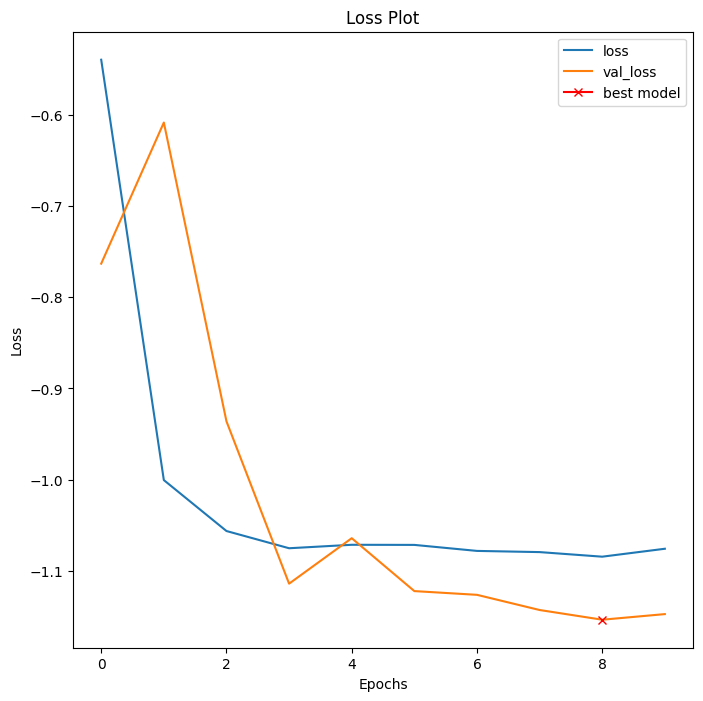

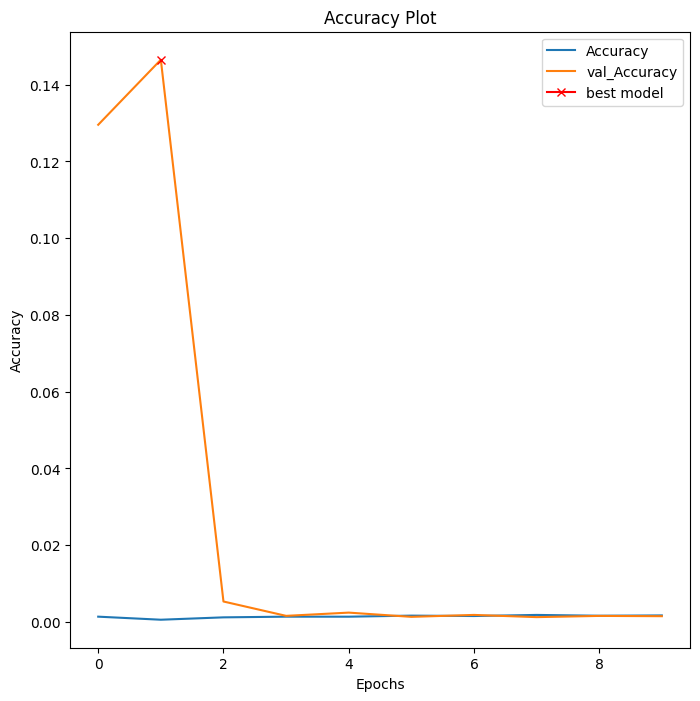

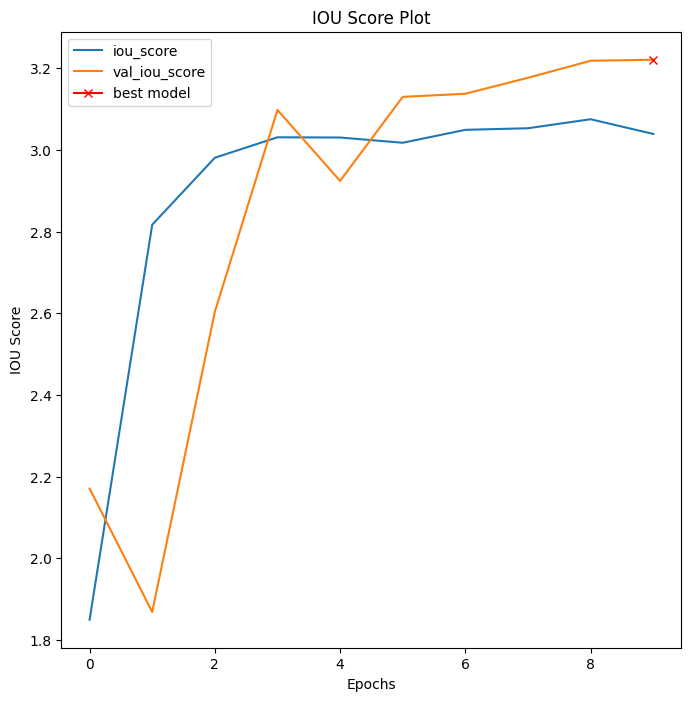

Dice Coeff :  1.5216081849774084
Accuracy 0.02927296784473583
Sensitivity :  0.0
Specificity :  1.0
F1-Score :  0.2596162498105678


In [15]:
evaluator1 = evaluation(model1, trainer2, test_images, test_labels)
evaluator1.plot_history()
evaluator1.print_report()

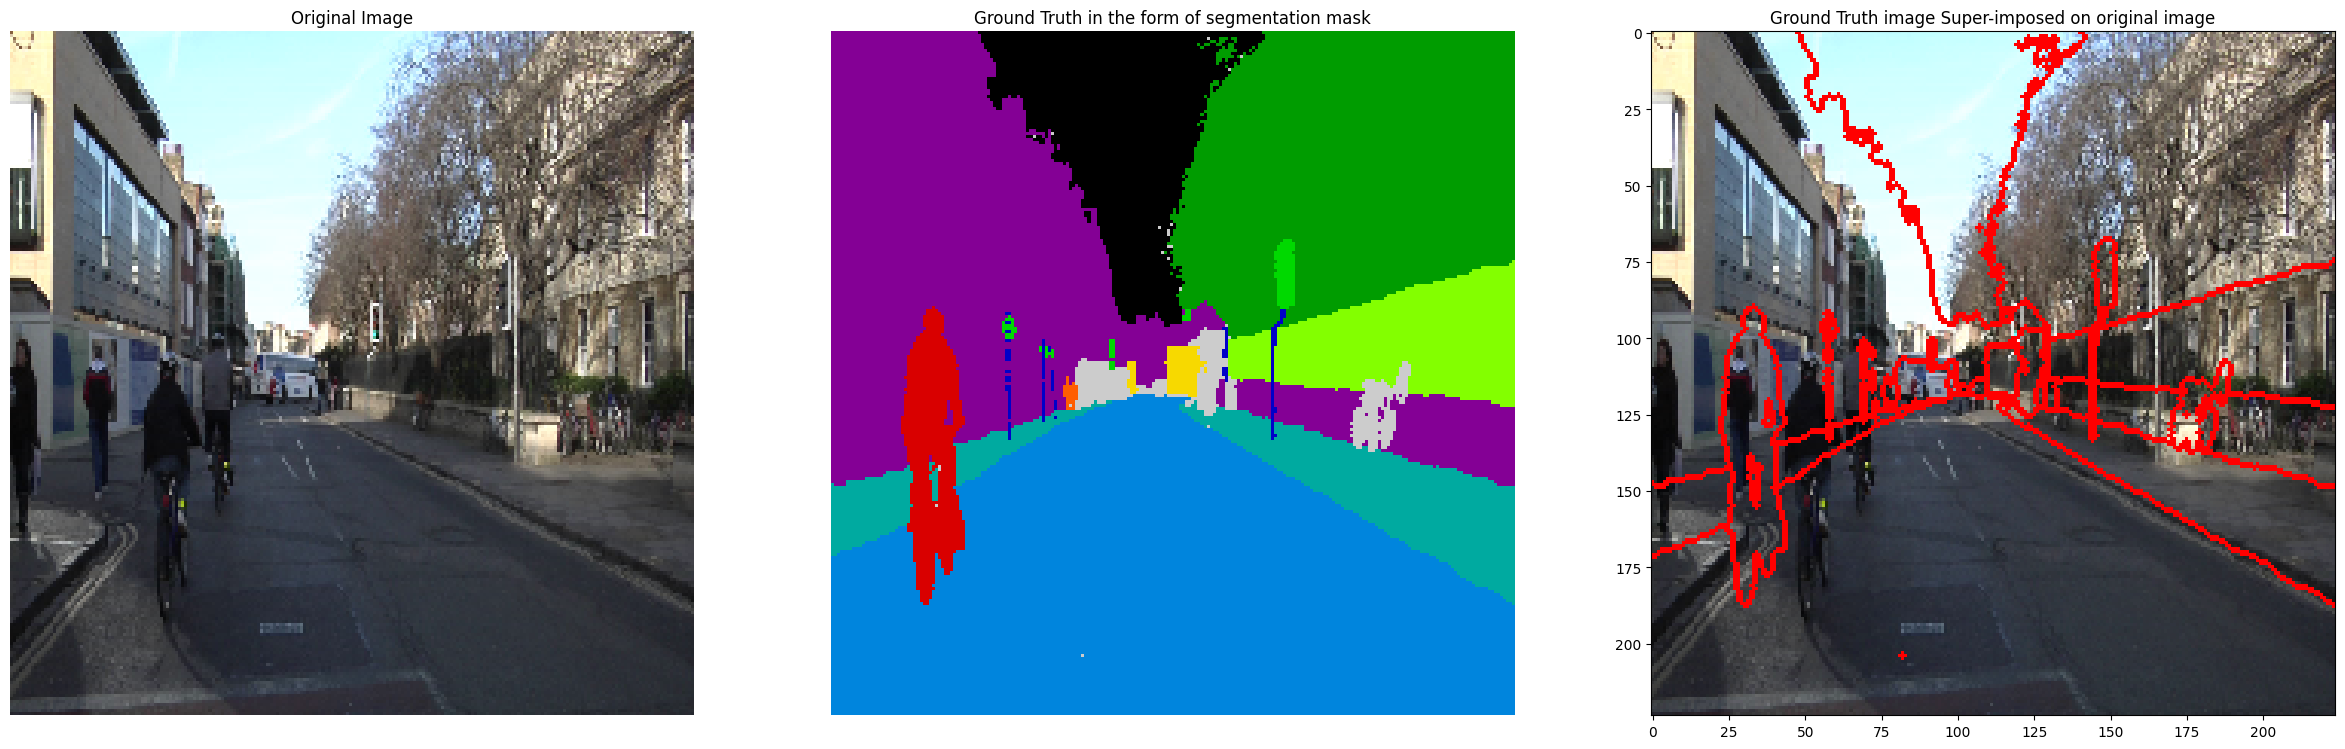

4/4 [==============================] - 0s 82ms/step


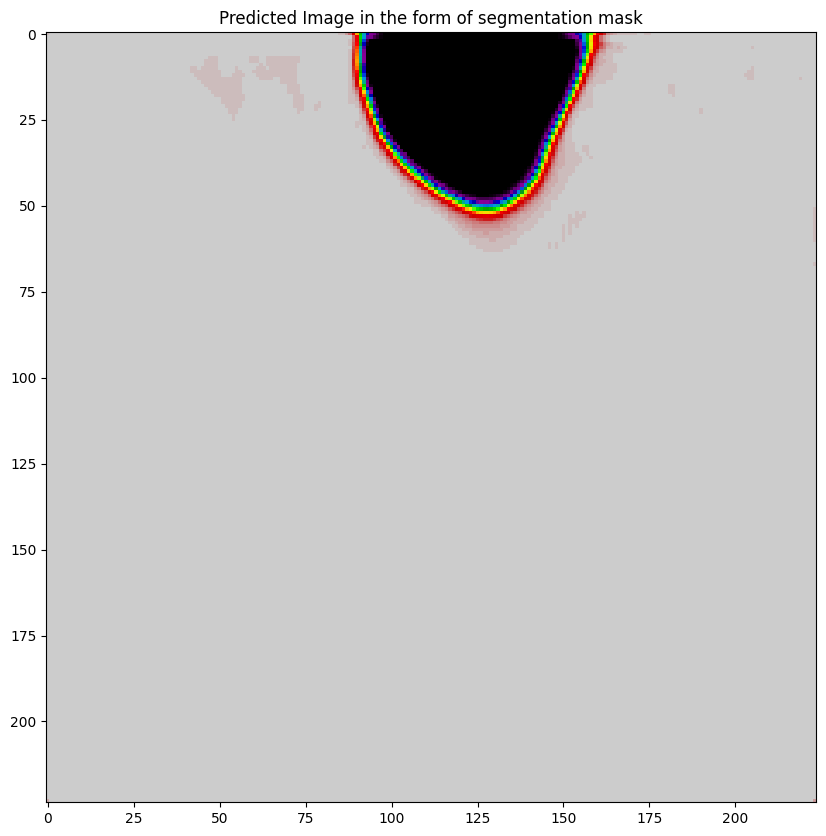

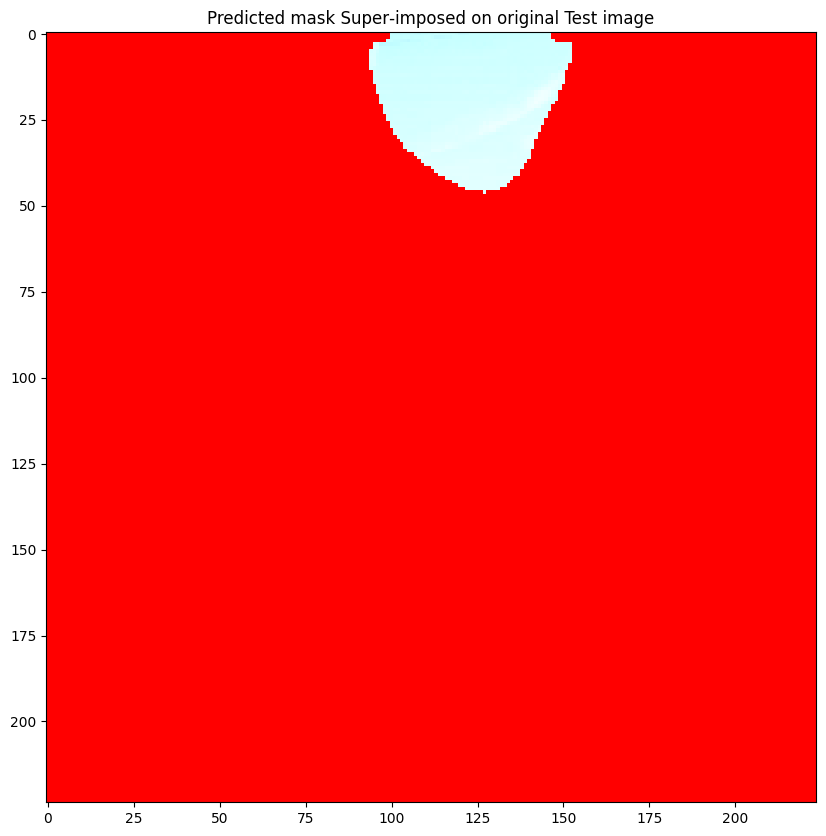

In [18]:
# Qualitative Analysis

plt.figure(figsize=(30,30))
plt.subplot(1, 3, 1)
plt.imshow(test_images[100])
plt.axis('off')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(test_labels[100], cmap='nipy_spectral')
plt.axis('off')
plt.title('Ground Truth in the form of segmentation mask')
plt.show


plt.subplot(1, 3, 3)
edges_pz = mark_boundaries(test_images[100], test_labels[100], color=(1,0,0), mode='thin')
plt.imshow(edges_pz)
plt.title('Ground Truth image Super-imposed on original image')
plt.show()

plt.figure(figsize=(10,10))
pred_image1 = model1.predict(test_images)
p1=pred_image1[3]
index_array = np.argmax(p1, axis=-1)
p1=np.take_along_axis(p1, np.expand_dims(index_array, axis=-1), axis=-1).squeeze(axis=-1)
plt.imshow(p1, cmap='nipy_spectral')
plt.title('Predicted Image in the form of segmentation mask')
plt.show()

plt.figure(figsize=(10,10))
edges_pz = mark_boundaries(test_images[3], p1, color=(1,0,0), mode='thin')
plt.imshow(edges_pz)
plt.title('Predicted mask Super‐imposed on original Test image')
plt.show()